In [251]:
import kiara
from kiara.interfaces.python_api import Step
from kiara.utils.jupyter import graph_to_image

# Table of contents
* [Assembling the workflow](#assembly)
    * [Creating the steps of the workflow](#creating_steps)
        * [Execution stage: 1](#execution_stage_1)
        * [Execution stage: 2](#execution_stage_2)
        * [Execution stage: 3](#execution_stage_3)
        * [Execution stage: 4](#execution_stage_4)
        * [Execution stage: 5](#execution_stage_5)
        * [Execution stage: 6](#execution_stage_6)
        * [Execution stage: 7](#execution_stage_7)
        * [Execution stage: 8](#execution_stage_8)
        * [Execution stage: 9](#execution_stage_9)
        * [Execution stage: 10](#execution_stage_10)
    * [Connecting the workflow steps](#connecting_steps)
* [Workflow information](#workflow_info)
* [Setting workflow inputs](#workflow_inputs)
* [Workflow results](#workflow_results)
    - [Step: ``read_files_in_folder``](#output_stage_1_read_files_in_folder)
    - [Step: ``create_table_from_csvs``](#output_stage_1_create_table_from_csvs)
    - [Step: ``extract_date_from_file_name``](#output_stage_1_extract_date_from_file_name)
    - [Step: ``extract_ref_from_file_name``](#output_stage_2_extract_ref_from_file_name)
    - [Step: ``lookup_publication_name``](#output_stage_1_lookup_publication_name)
    - [Step: ``create_date_range_filter``](#output_stage_2_create_date_range_filter)
    - [Step: ``merged_table``](#output_stage_1_merged_table)
    - [Step: ``filtered_table``](#output_stage_1_filtered_table)
    - [Step: ``tokenize_text_corpus``](#output_stage_1_tokenize_text_corpus)
    - [Step: ``remove_stopwords``](#output_stage_1_remove_stopwords)
    - [Step: ``lemmatize_corpus``](#output_stage_1_lemmatize_corpus)
    - [Step: ``generate_lda``](#output_stage_1_generate_lda)

# Description

Topic modelling dev pipeline.

# Assembling the workflow <a class="anchor" id="assembly"></a>

The first step in the creation of our workflow is to create the individual steps from the available *kiara* modules.

A list of available modules and their aliases can be found here: TODO

## Creating the steps of the workflow <a class="anchor" id="creating_steps"></a>

### Execution stage: 1 <a class="anchor" id="execution_stage_1"></a>

In [252]:


# Creating step: read_files_in_folder
step_read_files_in_folder = Step("onboarding.folder.import", step_id="read_files_in_folder")

### Execution stage: 2 <a class="anchor" id="execution_stage_2"></a>

In [253]:


# Creating step: create_table_from_csvs
step_create_table_from_csvs_config = {'columns': ['id', 'rel_path', 'file_name', 'content']}
step_create_table_from_csvs = Step(
    "table.from_file_bundle",
    module_config=step_create_table_from_csvs_config,
    step_id="create_table_from_csvs")

### Execution stage: 3 <a class="anchor" id="execution_stage_3"></a>

In [254]:


# Creating step: extract_date_from_file_name
step_extract_date_from_file_name_config = {'module_type': 'date.extract_from_string'}
step_extract_date_from_file_name = Step(
    "array.map",
    module_config=step_extract_date_from_file_name_config,
    step_id="extract_date_from_file_name")


# Creating step: extract_ref_from_file_name
step_extract_ref_from_file_name_config = {'module_type': 'string.match_regex', 'module_config': {'regex': '(\\w+\\d+)_\\d{4}-\\d{2}-\\d{2}_', 'only_first_match': True}}
step_extract_ref_from_file_name = Step(
    "array.map",
    module_config=step_extract_ref_from_file_name_config,
    step_id="extract_ref_from_file_name")

### Execution stage: 4 <a class="anchor" id="execution_stage_4"></a>

In [255]:


# Creating step: lookup_publication_name
step_lookup_publication_name_config = {'module_type': 'string.replace', 'module_config': {'replacement_map': {'sn85066408': "L\\'Italia", '2012271201': 'Cronaca Sovversiva'}}}
step_lookup_publication_name = Step(
    "array.map",
    module_config=step_lookup_publication_name_config,
    step_id="lookup_publication_name")


# Creating step: create_date_range_filter
step_create_date_range_filter_config = {'module_type': 'date.range_check', 'input_name': 'date'}
step_create_date_range_filter = Step(
    "array.map",
    module_config=step_create_date_range_filter_config,
    step_id="create_date_range_filter")

### Execution stage: 5 <a class="anchor" id="execution_stage_5"></a>

In [256]:


# Creating step: merged_table
step_merged_table = Step("table.merge", step_id="merged_table")

### Execution stage: 6 <a class="anchor" id="execution_stage_6"></a>

In [257]:


# Creating step: filtered_table
step_filtered_table = Step("table.filter.with_mask", step_id="filtered_table")

### Execution stage: 7 <a class="anchor" id="execution_stage_7"></a>

In [258]:


# Creating step: tokenize_text_corpus
step_tokenize_text_corpus_config = {'module_type': 'language.tokens.tokenize_text', 'input_name': 'text'}
step_tokenize_text_corpus = Step(
    "array.map",
    module_config=step_tokenize_text_corpus_config,
    step_id="tokenize_text_corpus")

### Execution stage: 8 <a class="anchor" id="execution_stage_8"></a>

In [259]:


# Creating step: remove_stopwords
step_remove_stopwords = Step("language.tokens.remove_stopwords", step_id="remove_stopwords")

### Execution stage: 9 <a class="anchor" id="execution_stage_9"></a>

In [260]:


# Creating step: lemmatize_corpus
step_lemmatize_corpus = Step("language.lemmatize.tokens_array", step_id="lemmatize_corpus")

### Execution stage: 10 <a class="anchor" id="execution_stage_10"></a>

In [261]:


# Creating step: generate_lda
step_generate_lda = Step("language.lda.LDA", step_id="generate_lda")


## Connecting the workflow steps <a class="anchor" id="connecting_steps"></a>

After we all steps are created, we need to wire them up to create our workflow structure. All step inputs that are not
connected to other step outputs are considered user inputs, and, if their values are marked as 'required', must be set
later in order for our workflow to run successfully.

#### Connecting inputs for: ``create_table_from_csvs``

In [262]:
step_create_table_from_csvs.input.files = step_read_files_in_folder.output.file_bundle

#### Connecting inputs for: ``extract_date_from_file_name``

In [263]:
step_extract_date_from_file_name.input.array = step_create_table_from_csvs.output.table.file_name

#### Connecting inputs for: ``extract_ref_from_file_name``

In [264]:
step_extract_ref_from_file_name.input.array = step_create_table_from_csvs.output.table.file_name

#### Connecting inputs for: ``lookup_publication_name``

In [265]:
step_lookup_publication_name.input.array = step_extract_ref_from_file_name.output.array

#### Connecting inputs for: ``create_date_range_filter``

In [266]:
step_create_date_range_filter.input.array = step_extract_date_from_file_name.output.array

#### Connecting inputs for: ``merged_table``

In [267]:

step_merged_table.input.sources = [
    step_create_table_from_csvs.output.table,
    step_extract_date_from_file_name.output.array,
    step_extract_ref_from_file_name.output.array,
    step_lookup_publication_name.output.array,
]

#### Connecting inputs for: ``filtered_table``

In [268]:
step_filtered_table.input.table = step_merged_table.output.table

In [269]:
step_filtered_table.input.mask = step_create_date_range_filter.output.array

#### Connecting inputs for: ``tokenize_text_corpus``

In [270]:
step_tokenize_text_corpus.input.array = step_filtered_table.output.table.content

#### Connecting inputs for: ``remove_stopwords``

In [271]:
step_remove_stopwords.input.token_lists = step_tokenize_text_corpus.output.array

#### Connecting inputs for: ``lemmatize_corpus``

In [272]:
step_lemmatize_corpus.input.tokens_array = step_remove_stopwords.output.token_list

#### Connecting inputs for: ``generate_lda``

In [273]:
step_generate_lda.input.tokens_array = step_lemmatize_corpus.output.tokens_array

# Workflow information <a class="anchor" id="workflow_info"></a>

After our workflow is wired up, we look can look at its structure, and other properties.
For that, we need to retrieve the dynamically assembled workflow object. We could do this from every one of the workflow steps,
since they all share the same workflow:

In [274]:
workflow = step_generate_lda.workflow

## Workflow execution graph

Let's look at the current execution graph for our workflow:

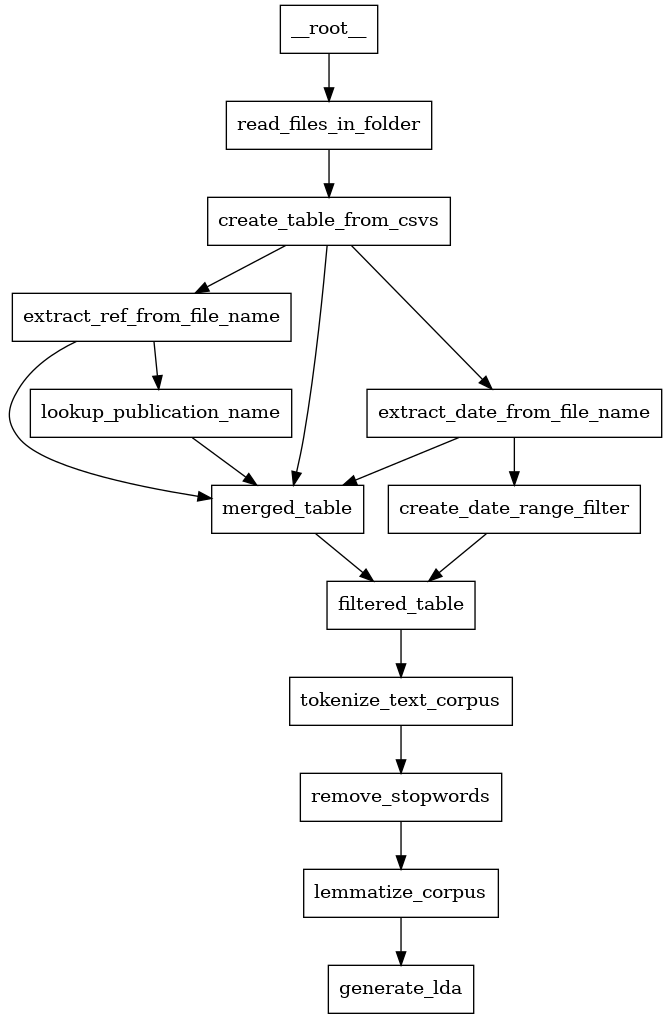

In [275]:
graph_to_image(workflow.structure.execution_graph)

# Setting workflow inputs <a class="anchor" id="workflow_inputs"></a>

The final step before running the workflow, is to set input values:

In [276]:

step_read_files_in_folder.input.path = "/home/markus/projects/dharpa/notebooks/TopicModelling/data_tm_workflow"
step_create_date_range_filter.input.earliest = "1919-01-01"
step_create_date_range_filter.input.latest = "2000-01-01"
step_remove_stopwords.input.languages = ['italian', 'german']
step_generate_lda.input.compute_coherence = True

# Workflow results <a class="anchor" id="workflow_results"></a>

We don't need to explicitly run the workflow, since our workflow object is smart enough to process the required steps
for the outputs we request. But we can do it nonetheless, because it helps us debug any issues there might be by printing
out the current workflow state:

In [277]:

workflow.process()
workflow

Pipeline state for: dynamic

Status: RESULTS_READY

Inputs / Outputs
                                                                                             
  ╭─ Inputs ──────────────────────────────────────────────────────────────────────────────╮  
  │                                                                                       │  
  │   Field name         Type      Description         Required      Status       Ready   │  
  │  ───────────────────────────────────────────────────────────────────────────────────  │  
  │   generate_lda__n…   integer   The number of       no           -- set --      yes    │  
  │                                topics.                                                │  
  │   generate_lda__c…   boolean   Whether to train    no           -- set --      yes    │  
  │                                the model without                                      │  
  │                                coherence                                              │  
  │                                calculation.                                           │  
  │   remove_stopword…   list      A list of           no           -- set --      yes    │  
  │                                language names to                                      │  
  │                                use default                                            │  
  │                                stopword lists                                         │  
  │                                for.                                                   │  
  │   remove_stopword…   list      A list of           no         -- not set --    yes    │  
  │                                additional,                                            │  
  │                                custom stopwords.                                      │  
  │   read_files_in_f…   string    The path to the     yes          -- set --      yes    │  
  │                                folder.                                                │  
  │   read_files_in_f…   list      A list of           no         -- not set --    yes    │  
  │                                strings, include                                       │  
  │                                all files where                                        │  
  │                                the filename ends                                      │  
  │                                with that string.                                      │  
  │   read_files_in_f…   list      A list of           no         -- not set --    yes    │  
  │                                strings, exclude                                       │  
  │                                all folders whose                                      │  
  │                                name ends with                                         │  
  │                                that string.                                           │  
  │   create_date_ran…   date      The earliest date   no           -- set --      yes    │  
  │                                that is allowed.                                       │  
  │   create_date_ran…   date      The latest date     no           -- set --      yes    │  
  │                                that is allowed.                                       │  
  │                                                                                       │  
  ╰───────────────────────────────────────────────────────────────────────────────────────╯  
  ╭─ Outputs ─────────────────────────────────────────────────────────────────────────────╮  
  │                                                                                       │  
  │   Field name         Type          Description         Required    Status     Ready   │  
  │  ───────────────────────────────────────────────────────────────────────────────────  │  
  │   generate_lda__t…   table         A table with        yes        -- set 

### Outputs for step: ``read_files_in_folder`` <a class="anchor" id="outputs_stage_1_read_files_in_folder"></a>

In [278]:
step_read_files_in_folder.info

╭─ Step info: read_files_in_folder (type: onboarding.folder.import) ────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Import a local folder and its metadata.                                                 │
│                                                                                           │
│   This module is usually the first step to import a local folder into the kiara data      │
│   store. It is necessary, because the folder needs to be copied to a different            │
│   location, so we can be sure it isn't modified outside of kiara. In most cases, this     │
│   step will be followed by a onboarding.file_bundle.save step.                            │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Import a local folder and its metadata.                                 │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         onboarding, core                                         │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064397.2733405-802680;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064397.2733605-242486;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064397.2733674-155989;https://dharpa.org/kiara_modules.core/modules_list.html#onboardingfolderimport\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064397.273375-238643;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/onboarding/folder.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    ImportFolderModule                                      │
│                     module_name   kiara_modules.core.onboarding.folder                    │
│                     full_name     kiara_modules.core.onboarding.folder.ImportFolderM…     │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                            

### Output: ``file_bundle``

In [279]:
step_read_files_in_folder.output_schemas["file_bundle"].doc

'The collection of files contained in the bundle.'

In [280]:
# #### Value metadata

In [281]:
step_read_files_in_folder.output.file_bundle.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            1b71dc38-c62c-438a-8abc-5a3b7a866ab8                                      │
│   type          file_bundle                                                               │
│   desc          The collection of files contained in the bundle.                          │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "python_cls": {                                                         │
│                     "class_name": "FileBundleMetadata",                                   │
│                     "module_name": "kiara_modules.core.metadata_schemas",                 │
│                     "full_name": "kiara_modules.core.metadata_schemas.FileBundleMetada…   │
│                   },                                                                      │
│                   "file_bundle": {                                                        │
│                     "orig_bundle_name": "data_tm_workflow",                               │
│                     "bundle_name": "data_tm_workflow",                                    │
│                     "orig_path": "/home/markus/projects/dharpa/notebooks/TopicModellin…   │
│                     "import_time": "2021-06-30T16:46:23.527103",                          │
│                     "number_of_files": 771,                                               │
│                     "included_files": {                                                   │
│                       "2012271201_1903-06-06_ed-1_seq-1_ocr.txt": {                       │
│                         "orig_filename": "2012271201_1903-06-06_ed-1_seq-1_ocr.txt",      │
│                         "orig_path": "/home/markus/projects/dharpa/notebooks/TopicMode…   │
│                         "import_time": "2021-06-30T16:46:23.399421",                      │
│                         "mime_type": "application/octet-stream",                          │
│                         "file_name": "2012271201_1903-06-06_ed-1_seq-1_ocr.txt",          │
│                         "size": 8966,                                                     │
│                         "path": "/home/markus/projects/dharpa/notebooks/TopicModelling…   │
│                       },                                                                  │
│                       "2012271201_1903-06-13_ed-1_seq-1_ocr.txt": {                       │
│                         "orig_filename": "2012271201_1903-06-13_ed-1_seq-1_ocr.txt",      │
│                         "orig_path": "/home/markus/projects/dharpa/notebooks/TopicMode…   │
│                         "import_time": "2021-06-30T16:46:23.399697",                      │
│                         "mime_type": "application/octet-stream",                          │
│                         "file_name": "2012271201_1903-06-13_ed-1_seq-1_ocr.txt",          │
│                         "size": 9511,                                                     │
│                         "path": "/home/markus/projects/dharpa/notebooks/TopicModelling…   │
│                       },                                                                  │
│                       "2012271201_1903-06-20_ed-1_seq-1_ocr.txt": {                       │
│                         "orig_filename": "2012271201_1903-06-20_ed-1_seq-1_ocr.txt",      │
│                         "orig_path": "/home/markus/projects/dharpa/notebooks/TopicMode…   │
│                         "import_time": "2021-06-30

#### Value data

In [282]:
kiara.pretty_print(step_read_files_in_folder.output.file_bundle.data)

FileBundle(name=data_tm_workflow)

### Outputs for step: ``create_table_from_csvs`` <a class="anchor" id="outputs_stage_1_create_table_from_csvs"></a>

In [283]:
step_create_table_from_csvs.info

╭─ Step info: create_table_from_csvs (type: table.from_file_bundle) ────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Create a table from a 'file_bundle'.                                                    │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Create a table from a 'file_bundle'.                                    │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         core                                                     │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064399.39267-149673;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064399.3926919-195793;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064399.3926995-5773;https://dharpa.org/kiara_modules.core/modules_list.html#tablefrom_file_bundle\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064399.3927062-230560;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/table/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    CreateTableFromTextFilesModule                          │
│                     module_name   kiara_modules.core.table                                │
│                     full_name     kiara_modules.core.table.CreateTableFromTextFilesM…     │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│                     "defaults": {},                                                       │
│                     "columns": [                                                          │
│                       "id",                                                               │
│                       "rel_path",                                                     

### Output: ``table``

In [284]:
step_create_table_from_csvs.output_schemas["table"].doc

"A table with the index column 'id', a column 'rel_path' that indicates the relative path of the file in the bundle, and a column 'content' that holds the (text) content of every file."

In [285]:
# #### Value metadata

In [286]:
step_create_table_from_csvs.output.table.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            972c02b1-4ece-4781-994d-8418a31f39c5                                      │
│   type          table                                                                     │
│   desc          A table with the index column 'id', a column 'rel_path' that indicates    │
│                 the relative path of the file in the bundle, and a column 'content'       │
│                 that holds the (text) content of every file.                              │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "table": {                                                              │
│                     "column_names": [                                                     │
│                       "id",                                                               │
│                       "rel_path",                                                         │
│                       "file_name",                                                        │
│                       "content"                                                           │
│                     ],                                                                    │
│                     "schema": {                                                           │
│                       "id": {                                                             │
│                         "arrow_type_name": "int64",                                       │
│                         "arrow_type_id": 9,                                               │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "rel_path": {                                                       │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "file_name": {                                                      │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "content": {                                                        │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       }                                                                   │
│                     },                                                                    │
│                     "rows": 771,                                                          │
│                     "size": 9822428                                                       │
│                   },                              

#### Value data

In [287]:
kiara.pretty_print(step_create_table_from_csvs.output.table.data)

 id    rel_path                   file_name                  content                      
   ───────────────────────────────────────────────────────────────────────────────────────   
    0     2012271201_1903-06-06_e…   2012271201_1903-06-06_e…   """" NUMERO Ebdomadario      
                                                                anàrchico propaganda         
                                                                rivoluzionaria, redezt       
                                                                miseria abea ...             
                                                                                             
    1     2012271201_1903-06-13_e…   2012271201_1903-06-13_e…   Ebdomadario anarchico        
                                                                propaganda                   
                                                                rivoluzionaria. XJt          
                                                                redezt miserìs abeat         
                                                                fortun ...                   
                                                                                             
    2     2012271201_1903-06-20_e…   2012271201_1903-06-20_e…   ANNO NUMERO VVER             
                                                                Ebdomadario anarchico        
                                                                propaganda                   
                                                                rivoluzionaria. redeat       
                                                                miserìs ...                  
                                                                                             
    3     2012271201_1903-06-27_e…   2012271201_1903-06-27_e…   Ebdomadàrio anarchico        
                                                                propaganda                   
                                                                rivoluzionaria. redeat       
                                                                miseris aheat fortuna su     
                                                                ...                          
                                                                                             
    4     2012271201_1903-07-04_e…   2012271201_1903-07-04_e…   NUMERO Ebdomadario           
                                                                anarchico propaganda         
                                                                rivoluzionaria. redeat       
                                                                miseiis abeat for ...        
                                                                                             
    5     2012271201_1903-07-25_e…   2012271201_1903-07-25_e…   ANNO KtJ SIERO               
                                                                Ebdomadario anarchico        
                                                                propaganda                   
                                                                rivoluzionaria. redest       
                                                                miseris a ...                
                                                                                             
    6     2012271201_1903-08-01_e…   2012271201_1903-08-01_e…   ANNO NUMEHO Ebdomadario      
                                                                anarchico propaganda         
                                                                rivoluzionaria. redeai       
                                                                miserìs abet ...             
                                                                                             
    7     2012271201_1903-08-08_e…   2012271201_1903-08-08_e…   Ciac vtj'y inn NUMERO        
                                                       

### Outputs for step: ``extract_date_from_file_name`` <a class="anchor" id="outputs_stage_1_extract_date_from_file_name"></a>

In [288]:
step_extract_date_from_file_name.info

╭─ Step info: extract_date_from_file_name (type: array.map) ────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Map a list of values into another list of values.                                       │
│                                                                                           │
│   This module must be configured with the type (and optional) configuration of another    │
│   kiara module. This 'child' module will then be used to compute the array items of the   │
│   result.                                                                                 │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Map a list of values into another list of values.                       │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         array, core                                              │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064399.639391-514159;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064399.639421-489991;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064399.639431-281593;https://dharpa.org/kiara_modules.core/modules_list.html#arraymap\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064399.6394403-707805;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/array/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MapModule                                               │
│                     module_name   kiara_modules.core.array                                │
│                     full_name     kiara_modules.core.array.MapModule                      │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│     

### Output: ``array``

In [289]:
step_extract_date_from_file_name.output_schemas["array"].doc

"An array of equal length to the input array, containing the 'mapped' values."

In [290]:
# #### Value metadata

In [291]:
step_extract_date_from_file_name.output.array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            32508f1b-783e-48ca-a854-e4c23b7ebeb3                                      │
│   type          array                                                                     │
│   desc          An array of equal length to the input array, containing the 'mapped'      │
│                 values.                                                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 771,                                                        │
│                     "size": 6168                                                          │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "TimestampArray",                                       │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.TimestampArray"                             │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [292]:
kiara.pretty_print(step_extract_date_from_file_name.output.array.data)

<pyarrow.lib.TimestampArray object at 0x7f9b704f74c0>                                      
  [                                                                                          
    1903-06-06 00:00:00.000000,                                                              
    1903-06-13 00:00:00.000000,                                                              
    1903-06-20 00:00:00.000000,                                                              
    1903-06-27 00:00:00.000000,                                                              
    1903-07-04 00:00:00.000000,                                                              
    1903-07-25 00:00:00.000000,                                                              
    1903-08-01 00:00:00.000000,                                                              
    1903-08-08 00:00:00.000000,                                                              
    1903-08-15 00:00:00.000000,                                                              
    1903-08-22 00:00:00.000000,                                                              
    ...                                                                                      
    1918-03-16 00:00:00.000000,                                                              
    1918-03-23 00:00:00.000000,                                                              
    1918-03-30 00:00:00.000000,                                                              
    1918-04-06 00:00:00.000000,                                                              
    1918-04-13 00:00:00.000000,                                                              
    1918-04-20 00:00:00.000000,                                                              
    1918-06-06 00:00:00.000000,                                                              
    1918-07-18 00:00:00.000000,                                                              
    1919-03-20 00:00:00.000000,                                                              
    1919-05-01 00:00:00.000000                                                               
  ]

### Outputs for step: ``extract_ref_from_file_name`` <a class="anchor" id="outputs_stage_2_extract_ref_from_file_name"></a>

In [293]:
step_extract_ref_from_file_name.info

╭─ Step info: extract_ref_from_file_name (type: array.map) ─────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Map a list of values into another list of values.                                       │
│                                                                                           │
│   This module must be configured with the type (and optional) configuration of another    │
│   kiara module. This 'child' module will then be used to compute the array items of the   │
│   result.                                                                                 │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Map a list of values into another list of values.                       │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         array, core                                              │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064399.829777-847352;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064399.8298004-990720;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064399.829807-695006;https://dharpa.org/kiara_modules.core/modules_list.html#arraymap\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064399.8298137-588566;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/array/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MapModule                                               │
│                     module_name   kiara_modules.core.array                                │
│                     full_name     kiara_modules.core.array.MapModule                      │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│    

### Output: ``array``

In [294]:
step_extract_ref_from_file_name.output_schemas["array"].doc

"An array of equal length to the input array, containing the 'mapped' values."

In [295]:
# #### Value metadata

In [296]:
step_extract_ref_from_file_name.output.array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            4983075c-a2e3-4706-a282-5fb3c7220c6e                                      │
│   type          array                                                                     │
│   desc          An array of equal length to the input array, containing the 'mapped'      │
│                 values.                                                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 771,                                                        │
│                     "size": 10798                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "StringArray",                                          │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.StringArray"                                │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [297]:
kiara.pretty_print(step_extract_ref_from_file_name.output.array.data)

<pyarrow.lib.StringArray object at 0x7f9b75726b80>                                         
  [                                                                                          
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    ...                                                                                      
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201",                                                                            
    "2012271201"                                                                             
  ]

### Outputs for step: ``lookup_publication_name`` <a class="anchor" id="outputs_stage_1_lookup_publication_name"></a>

In [298]:
step_lookup_publication_name.info

╭─ Step info: lookup_publication_name (type: array.map) ────────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Map a list of values into another list of values.                                       │
│                                                                                           │
│   This module must be configured with the type (and optional) configuration of another    │
│   kiara module. This 'child' module will then be used to compute the array items of the   │
│   result.                                                                                 │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Map a list of values into another list of values.                       │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         array, core                                              │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064400.0013392-433218;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064400.0013585-41687;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064400.0013657-357755;https://dharpa.org/kiara_modules.core/modules_list.html#arraymap\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064400.0013726-295748;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/array/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MapModule                                               │
│                     module_name   kiara_modules.core.array                                │
│                     full_name     kiara_modules.core.array.MapModule                      │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│   

### Output: ``array``

In [299]:
step_lookup_publication_name.output_schemas["array"].doc

"An array of equal length to the input array, containing the 'mapped' values."

In [300]:
# #### Value metadata

In [301]:
step_lookup_publication_name.output.array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            6226e31d-90b3-4a83-a5a3-9c10d906fcfb                                      │
│   type          array                                                                     │
│   desc          An array of equal length to the input array, containing the 'mapped'      │
│                 values.                                                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 771,                                                        │
│                     "size": 16966                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "StringArray",                                          │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.StringArray"                                │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [302]:
kiara.pretty_print(step_lookup_publication_name.output.array.data)

<pyarrow.lib.StringArray object at 0x7f9b70631a60>                                         
  [                                                                                          
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    ...                                                                                      
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva",                                                                    
    "Cronaca Sovversiva"                                                                     
  ]

### Outputs for step: ``create_date_range_filter`` <a class="anchor" id="outputs_stage_2_create_date_range_filter"></a>

In [303]:
step_create_date_range_filter.info

╭─ Step info: create_date_range_filter (type: array.map) ───────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Map a list of values into another list of values.                                       │
│                                                                                           │
│   This module must be configured with the type (and optional) configuration of another    │
│   kiara module. This 'child' module will then be used to compute the array items of the   │
│   result.                                                                                 │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Map a list of values into another list of values.                       │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         array, core                                              │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064400.1728776-849885;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064400.1729035-80378;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064400.172911-251265;https://dharpa.org/kiara_modules.core/modules_list.html#arraymap\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064400.1729188-744124;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/array/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MapModule                                               │
│                     module_name   kiara_modules.core.array                                │
│                     full_name     kiara_modules.core.array.MapModule                      │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│    

### Output: ``array``

In [304]:
step_create_date_range_filter.output_schemas["array"].doc

"An array of equal length to the input array, containing the 'mapped' values."

In [305]:
# #### Value metadata

In [306]:
step_create_date_range_filter.output.array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            1b9d164a-d74b-42be-9de2-feb6429e88f0                                      │
│   type          array                                                                     │
│   desc          An array of equal length to the input array, containing the 'mapped'      │
│                 values.                                                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 771,                                                        │
│                     "size": 97                                                            │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "BooleanArray",                                         │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.BooleanArray"                               │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [307]:
kiara.pretty_print(step_create_date_range_filter.output.array.data)

<pyarrow.lib.BooleanArray object at 0x7f9b754adac0>                                        
  [                                                                                          
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    ...                                                                                      
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    false,                                                                                   
    true,                                                                                    
    true                                                                                     
  ]

### Outputs for step: ``merged_table`` <a class="anchor" id="outputs_stage_1_merged_table"></a>

In [308]:
step_merged_table.info

╭─ Step info: merged_table (type: table.merge) ─────────────────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Create a table from other tables and/or arrays.                                         │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Create a table from other tables and/or arrays.                         │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         core                                                     │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064400.3477864-687598;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064400.3478067-480553;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064400.347814-687184;https://dharpa.org/kiara_modules.core/modules_list.html#tablemerge\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064400.3478208-158560;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/table/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MergeTableModule                                        │
│                     module_name   kiara_modules.core.table                                │
│                     full_name     kiara_modules.core.table.MergeTableModule               │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│                     "defaults": {}                                                        │
│                   }                                                                       │
│                                                                                           │
│   Inputs                                                                                  │
│ 

### Output: ``table``

In [309]:
step_merged_table.output_schemas["table"].doc

'The merged table, including all source tables and columns.'

In [310]:
# #### Value metadata

In [311]:
step_merged_table.output.table.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            d05d44e6-6668-45ff-95e1-2d4a67a47c56                                      │
│   type          table                                                                     │
│   desc          The merged table, including all source tables and columns.                │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "table": {                                                              │
│                     "column_names": [                                                     │
│                       "id",                                                               │
│                       "rel_path",                                                         │
│                       "file_name",                                                        │
│                       "content",                                                          │
│                       "extract_date_from_file_name",                                      │
│                       "extract_ref_from_file_name",                                       │
│                       "lookup_publication_name"                                           │
│                     ],                                                                    │
│                     "schema": {                                                           │
│                       "id": {                                                             │
│                         "arrow_type_name": "int64",                                       │
│                         "arrow_type_id": 9,                                               │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "rel_path": {                                                       │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "file_name": {                                                      │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "content": {                                                        │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "extract_date_from_file_name": {                                    │
│                         "arrow_type_name": "timestamp[us]",                               │
│                         "arrow_type_id": 18,      

#### Value data

In [312]:
kiara.pretty_print(step_merged_table.output.table.data)

 id    rel_path      file_name     content       extract_d…   extract_re…   lookup_pu…    
   ───────────────────────────────────────────────────────────────────────────────────────   
    0     2012271201…   2012271201…   """" NUMERO   1903-06-06   2012271201    Cronaca       
                                      Ebdomadario   00:00:00                   Sovversiva    
                                      anàrchico                                              
                                      propaganda                                             
                                      rivoluzion…                                            
                                      redezt                                                 
                                      miseria                                                
                                      abea ...                                               
                                                                                             
    1     2012271201…   2012271201…   Ebdomadario   1903-06-13   2012271201    Cronaca       
                                      anarchico     00:00:00                   Sovversiva    
                                      propaganda                                             
                                      rivoluzion…                                            
                                      XJt redezt                                             
                                      miserìs                                                
                                      abeat                                                  
                                      fortun ...                                             
                                                                                             
    2     2012271201…   2012271201…   ANNO NUMERO   1903-06-20   2012271201    Cronaca       
                                      VVER          00:00:00                   Sovversiva    
                                      Ebdomadario                                            
                                      anarchico                                              
                                      propaganda                                             
                                      rivoluzion…                                            
                                      redeat                                                 
                                      miserìs ...                                            
                                                                                             
    3     2012271201…   2012271201…   Ebdomadàrio   1903-06-27   2012271201    Cronaca       
                                      anarchico     00:00:00                   Sovversiva    
                                      propaganda                                             
                                      rivoluzion…                                            
                                      redeat                                                 
                                      miseris                                                
                                      aheat                                                  
                                      fortuna su                                             
                                      ...                                                    
                                                                                             
    4     2012271201…   2012271201…   NUMERO        1903-07-04   2012271201    Cronaca       
                                      Ebdomadario   00:00:00                   Sovversiva    
                                      anarchico                                              
                                      propaganda       

### Outputs for step: ``filtered_table`` <a class="anchor" id="outputs_stage_1_filtered_table"></a>

In [313]:
step_filtered_table.info

╭─ Step info: filtered_table (type: table.filter.with_mask) ────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Filter a table using a mask array.                                                      │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Filter a table using a mask array.                                      │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         core                                                     │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064400.6220582-712890;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064400.6220813-372118;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064400.6220887-604375;https://dharpa.org/kiara_modules.core/modules_list.html#tablefilterwith_mask\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064400.6220953-535983;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/table/filter.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    CreateFilteredTableModule                               │
│                     module_name   kiara_modules.core.table.filter                         │
│                     full_name     kiara_modules.core.table.filter.CreateFilteredTabl…     │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│                     "defaults": {}                                                        │
│                   }                                                                       │
│                                                                                           │
│   Inputs                                                                             

### Output: ``table``

In [314]:
step_filtered_table.output_schemas["table"].doc

'The filtered table.'

In [315]:
# #### Value metadata

In [316]:
step_filtered_table.output.table.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            a9a2ee8d-4ce1-40e5-9fef-842886d1435a                                      │
│   type          table                                                                     │
│   desc          The filtered table.                                                       │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "table": {                                                              │
│                     "column_names": [                                                     │
│                       "id",                                                               │
│                       "rel_path",                                                         │
│                       "file_name",                                                        │
│                       "content",                                                          │
│                       "extract_date_from_file_name",                                      │
│                       "extract_ref_from_file_name",                                       │
│                       "lookup_publication_name"                                           │
│                     ],                                                                    │
│                     "schema": {                                                           │
│                       "id": {                                                             │
│                         "arrow_type_name": "int64",                                       │
│                         "arrow_type_id": 9,                                               │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "rel_path": {                                                       │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "file_name": {                                                      │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "content": {                                                        │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "extract_date_from_file_name": {                                    │
│                         "arrow_type_name": "timestamp[us]",                               │
│                         "arrow_type_id": 18,      

#### Value data

In [317]:
kiara.pretty_print(step_filtered_table.output.table.data)

 id    rel_path      file_name     content       extract_d…   extract_re…   lookup_pu…    
   ───────────────────────────────────────────────────────────────────────────────────────   
    769   2012271201…   2012271201…   ANNO XVn      1919-03-20   2012271201    Cronaca       
                                      No. ...und    00:00:00                   Sovversiva    
                                      heute geht                                             
                                      eine neue                                              
                                      Epoche der                                             
                                      eltgesclii…                                            
                                      aus" cuore                                             
                                      de ...                                                 
                                                                                             
    770   2012271201…   2012271201…   ANNO XVn      1919-05-01   2012271201    Cronaca       
                                      No. cose      00:00:00                   Sovversiva    
                                      ora                                                    
                                      Francia.                                               
                                      Parigi                                                 
                                      l'assoluzi…                                            
                                      Rao Villain                                            
                                      che nel                                                
                                      alla gil                                               
                                      ...

### Outputs for step: ``tokenize_text_corpus`` <a class="anchor" id="outputs_stage_1_tokenize_text_corpus"></a>

In [318]:
step_tokenize_text_corpus.info

╭─ Step info: tokenize_text_corpus (type: array.map) ───────────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Map a list of values into another list of values.                                       │
│                                                                                           │
│   This module must be configured with the type (and optional) configuration of another    │
│   kiara module. This 'child' module will then be used to compute the array items of the   │
│   result.                                                                                 │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Map a list of values into another list of values.                       │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         array, core                                              │
│                     Labels       package: kiara_modules.core                              │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064400.8298259-458531;https://github.com/DHARPA-Project/kiara_modules.core\https://github.com/DHARPA-Project/kiara_modules.core]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064400.829852-78584;https://dharpa.org/kiara_modules.core/\https://dharpa.org/kiara_modules.core/]8;;\                   │
│                                  module_doc:                                              │
│                                  ]8;id=1625064400.8298597-404507;https://dharpa.org/kiara_modules.core/modules_list.html#arraymap\https://dharpa.org/kiara_modules.core/modules_list.…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064400.8298676-376751;https://github.com/DHARPA-Project/kiara_modules.core/blob/main/src/kiara_modules/core/array/__init__.py\https://github.com/DHARPA-Project/kiara_modules.cor…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    MapModule                                               │
│                     module_name   kiara_modules.core.array                                │
│                     full_name     kiara_modules.core.array.MapModule                      │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│    

### Output: ``array``

In [319]:
step_tokenize_text_corpus.output_schemas["array"].doc

"An array of equal length to the input array, containing the 'mapped' values."

In [320]:
# #### Value metadata

In [321]:
step_tokenize_text_corpus.output.array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            1e23a9b4-26a3-4810-9dc6-dc91ece030f5                                      │
│   type          array                                                                     │
│   desc          An array of equal length to the input array, containing the 'mapped'      │
│                 values.                                                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 2,                                                          │
│                     "size": 39772                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "ListArray",                                            │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.ListArray"                                  │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [322]:
kiara.pretty_print(step_tokenize_text_corpus.output.array.data)

<pyarrow.lib.ListArray object at 0x7f9b74c63ca0>                                           
  [                                                                                          
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "und",                                                                                 
      "heute",                                                                               
      "geht",                                                                                
      "eine",                                                                                
      "neue",                                                                                
      "epoche",                                                                              
      "der",                                                                                 
      "eltgescliighte",                                                                      
      ...                                                                                    
      "giogo",                                                                               
      "dei",                                                                                 
      "nuovi",                                                                               
      "mandriani",                                                                           
      "che",                                                                                 
      "mutato",                                                                              
      "appena",                                                                              
      "nome",                                                                                
      "livrea",                                                                              
      "hanno"                                                                                
    ],                                                                                       
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "cose",                                                                                
      "ora",                                                                                 
      "francia",                                                                             
      "parigi",                                                                              
      "rao",                                                                                 
      "villain",                                                                             
      "che",                                                                                 
      "nel",                                                                                 
      ...                                                                                    
      "ventre",                                                                              
      "lorsignori",                                                                          
      "non",                                                                                 
      "dovremo",                                                                             
      "aspettare",                                                                           
      "pezzo",                                        

### Outputs for step: ``remove_stopwords`` <a class="anchor" id="outputs_stage_1_remove_stopwords"></a>

In [323]:
step_remove_stopwords.info

╭─ Step info: remove_stopwords (type: language.tokens.remove_stopwords) ────────────────────╮
│                                                                                           │
│                                                                                           │
│   Remove stopwords from an array of token-lists.                                          │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Remove stopwords from an array of token-lists.                          │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         language_processing                                      │
│                     Labels       package: kiara_modules.language_processing               │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064401.0291946-46577;https://github.com/DHARPA-Project/kiara_modules.language_processing\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064401.0292215-628388;https://dharpa.org/kiara_modules.language_processing/\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  module_doc:                                              │
│                                  ]8;id=1625064401.02923-637088;https://dharpa.org/kiara_modules.language_processing/modules_list.html#languagetokensremove_stopwords\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064401.0292478-170593;https://github.com/DHARPA-Project/kiara_modules.language_processing/blob/main/src/kiara_modules/language_processing/tokens.py\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    RemoveStopwordsModule                                   │
│                     module_name   kiara_modules.language_processing.tokens                │
│                     full_name     kiara_modules.language_processing.tokens.RemoveSto…     │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│                     "defaults": {}                                                        │
│                   }                                                                       │
│                                                                                           │
│   Inputs 

### Output: ``token_list``

In [324]:
step_remove_stopwords.output_schemas["token_list"].doc

'An array of string lists, with the stopwords removed.'

In [325]:
# #### Value metadata

In [326]:
step_remove_stopwords.output.token_list.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            cd57a9ec-6fd2-4411-87a1-d13178c97648                                      │
│   type          array                                                                     │
│   desc          An array of string lists, with the stopwords removed.                     │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 2,                                                          │
│                     "size": 31352                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "ListArray",                                            │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.ListArray"                                  │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [327]:
kiara.pretty_print(step_remove_stopwords.output.token_list.data)

<pyarrow.lib.ListArray object at 0x7f9b74c63640>                                           
  [                                                                                          
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "heute",                                                                               
      "geht",                                                                                
      "neue",                                                                                
      "epoche",                                                                              
      "eltgescliighte",                                                                      
      "cuore",                                                                               
      "mondo",                                                                               
      "sveglia",                                                                             
      ...                                                                                    
      "reclineranno",                                                                        
      "cervice",                                                                             
      "sotto",                                                                               
      "giogo",                                                                               
      "nuovi",                                                                               
      "mandriani",                                                                           
      "mutato",                                                                              
      "appena",                                                                              
      "nome",                                                                                
      "livrea"                                                                               
    ],                                                                                       
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "cose",                                                                                
      "ora",                                                                                 
      "francia",                                                                             
      "parigi",                                                                              
      "rao",                                                                                 
      "villain",                                                                             
      "gilia",                                                                               
      "guerra",                                                                              
      ...                                                                                    
      "for",                                                                                 
      "ventre",                                                                              
      "lorsignori",                                                                          
      "dovremo",                                                                             
      "aspettare",                                                                           
      "pezzo",                                        

### Outputs for step: ``lemmatize_corpus`` <a class="anchor" id="outputs_stage_1_lemmatize_corpus"></a>

In [328]:
step_lemmatize_corpus.info

╭─ Step info: lemmatize_corpus (type: language.lemmatize.tokens_array) ─────────────────────╮
│                                                                                           │
│                                                                                           │
│   Lemmatize an array of token lists.                                                      │
│                                                                                           │
│   Compared to using the lemmatize_tokens module in combination with map, this is much     │
│   faster, since it uses a spacy ]8;id=1625064401.212518-463515;https://spacy.io/api/language#pipe\pipe]8;;\ under the hood.                                      │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Lemmatize an array of token lists.                                      │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         language_processing                                      │
│                     Labels       package: kiara_modules.language_processing               │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064401.235713-381923;https://github.com/DHARPA-Project/kiara_modules.language_processing\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064401.235737-158345;https://dharpa.org/kiara_modules.language_processing/\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  module_doc:                                              │
│                                  ]8;id=1625064401.2357445-634196;https://dharpa.org/kiara_modules.language_processing/modules_list.html#languagelemmatizetokens_array\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064401.235751-135022;https://github.com/DHARPA-Project/kiara_modules.language_processing/blob/main/src/kiara_modules/language_processing/lemmatize.py\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    LemmatizeTokensArrayModule                              │
│                     module_name   kiara_modules.language_processing.lemmatize             │
│                     full_name     kiara_modules.language_processing.lemmatize.Lemmat…     │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "const

### Output: ``tokens_array``

In [329]:
step_lemmatize_corpus.output_schemas["tokens_array"].doc

'An array of lists of lemmatized tokens.'

In [330]:
# #### Value metadata

In [331]:
step_lemmatize_corpus.output.tokens_array.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            9684c08e-b361-4b65-9f9d-5403c71ef7d8                                      │
│   type          array                                                                     │
│   desc          An array of lists of lemmatized tokens.                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "array": {                                                              │
│                     "length": 2,                                                          │
│                     "size": 31800                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "ListArray",                                            │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.ListArray"                                  │
│                   }                                                                       │
│                 }                                                                         │
│                                                                                           │
╰───────────────────────────────────────────────────────────────────────────────────────────╯

#### Value data

In [332]:
kiara.pretty_print(step_lemmatize_corpus.output.tokens_array.data)

<pyarrow.lib.ListArray object at 0x7f9b760b5640>                                           
  [                                                                                          
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "heute",                                                                               
      "geht",                                                                                
      "neue",                                                                                
      "epoca",                                                                               
      "eltgescliighte",                                                                      
      "cuore",                                                                               
      "mondare",                                                                             
      "sveglio",                                                                             
      ...                                                                                    
      "reclinare",                                                                           
      "cervice",                                                                             
      "sotto",                                                                               
      "giogo",                                                                               
      "nuovo",                                                                               
      "mandriani",                                                                           
      "mutare",                                                                              
      "appena",                                                                              
      "nome",                                                                                
      "livrea"                                                                               
    ],                                                                                       
    [                                                                                        
      "anno",                                                                                
      "xvn",                                                                                 
      "cosa",                                                                                
      "orare",                                                                               
      "francia",                                                                             
      "parigi",                                                                              
      "rao",                                                                                 
      "villain",                                                                             
      "gilia",                                                                               
      "guerra",                                                                              
      ...                                                                                    
      "for",                                                                                 
      "ventre",                                                                              
      "lorsignori",                                                                          
      "dovere",                                                                              
      "aspettare",                                                                           
      "pezzo",                                        

### Outputs for step: ``generate_lda`` <a class="anchor" id="outputs_stage_1_generate_lda"></a>

In [333]:
step_generate_lda.info

╭─ Step info: generate_lda (type: language.lda.LDA) ────────────────────────────────────────╮
│                                                                                           │
│                                                                                           │
│   Perform Latent Dirichlet Allocation on a tokenized corpus.                              │
│                                                                                           │
│                                                                                           │
│                                                                                           │
│   Description     Perform Latent Dirichlet Allocation on a tokenized corpus.              │
│                                                                                           │
│   Origin                                                                                  │
│                     Authors   Markus Binsteiner (markus.binsteiner@uni.lu)                │
│                                                                                           │
│                                                                                           │
│   Type context                                                                            │
│                     Tags         language_processing                                      │
│                     Labels       package: kiara_modules.language_processing               │
│                     References   source_repo:                                             │
│                                  ]8;id=1625064401.4378793-10955;https://github.com/DHARPA-Project/kiara_modules.language_processing\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                  documentation:                                           │
│                                  ]8;id=1625064401.4379125-433885;https://dharpa.org/kiara_modules.language_processing/\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  module_doc:                                              │
│                                  ]8;id=1625064401.437923-937087;https://dharpa.org/kiara_modules.language_processing/modules_list.html#languageldaLDA\https://dharpa.org/kiara_modules.language_processin…]8;;\     │
│                                  source_url:                                              │
│                                  ]8;id=1625064401.4379487-327491;https://github.com/DHARPA-Project/kiara_modules.language_processing/blob/main/src/kiara_modules/language_processing/lda.py\https://github.com/DHARPA-Project/kiara_modules.lan…]8;;\     │
│                                                                                           │
│                                                                                           │
│   Python class                                                                            │
│                     class_name    LDAModule                                               │
│                     module_name   kiara_modules.language_processing.lda                   │
│                     full_name     kiara_modules.language_processing.lda.LDAModule         │
│                                                                                           │
│                                                                                           │
│   Configuration   {                                                                       │
│                     "constants": {},                                                      │
│                     "defaults": {}                                                        │
│                   }                                                                       │
│                                                                                           │
│   Inputs                   

### Output: ``topic_model``

In [334]:
step_generate_lda.output_schemas["topic_model"].doc

"A table with 'topic_id' and 'words' columns (also 'num_topics', if coherence calculation was switched on)."

In [335]:
# #### Value metadata

In [336]:
step_generate_lda.output.topic_model.value

╭─ Value: n/a ──────────────────────────────────────────────────────────────────────────────╮
│                                                                                           │
│   id            c76dab80-808c-49e2-9857-986afa75eebc                                      │
│   type          table                                                                     │
│   desc          A table with 'topic_id' and 'words' columns (also 'num_topics', if        │
│                 coherence calculation was switched on).                                   │
│   is set        yes                                                                       │
│   is constant   no                                                                        │
│   hash          -- deferred --                                                            │
│   metadata      {                                                                         │
│                   "table": {                                                              │
│                     "column_names": [                                                     │
│                       "topic_id",                                                         │
│                       "words",                                                            │
│                       "num_topics"                                                        │
│                     ],                                                                    │
│                     "schema": {                                                           │
│                       "topic_id": {                                                       │
│                         "arrow_type_name": "int64",                                       │
│                         "arrow_type_id": 9,                                               │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "words": {                                                          │
│                         "arrow_type_name": "string",                                      │
│                         "arrow_type_id": 13,                                              │
│                         "metadata": {}                                                    │
│                       },                                                                  │
│                       "num_topics": {                                                     │
│                         "arrow_type_name": "int64",                                       │
│                         "arrow_type_id": 9,                                               │
│                         "metadata": {}                                                    │
│                       }                                                                   │
│                     },                                                                    │
│                     "rows": 187,                                                          │
│                     "size": 51270                                                         │
│                   },                                                                      │
│                   "python_cls": {                                                         │
│                     "class_name": "Table",                                                │
│                     "module_name": "pyarrow.lib",                                         │
│                     "full_name": "pyarrow.lib.Table"                                      │
│                   }                                                                       │
│                 }                                                                         │
│                                                   

#### Value data

In [337]:
kiara.pretty_print(step_generate_lda.output.topic_model.data)

 topic_id   words                                                           num_topics    
   ───────────────────────────────────────────────────────────────────────────────────────   
    1          perchè, rivoluzione, primo, guerra, ogni, stare, nuovo,         3             
               governare, repubblica, s ...                                                  
    2          rivoluzione, perchè, ogni, primo, guerra, stare, nuovo,         3             
               libertà, sempre, repubbl ...                                                  
    3          perchè, ogni, rivoluzione, guerra, repubblica, primo, senza,    3             
               stare, sempre, gove ...                                                       
    1          rivoluzione, perchè, primo, ogni, guerra, nuovo, stare,         4             
               governare, senza, vittor ...                                                  
    2          guerra, repubblica, perchè, ogni, rivoluzione, stare, primo,    4             
               governare, libertà, ...                                                       
    3          perchè, rivoluzione, primo, ogni, stare, guerra, sempre,        4             
               repubblica, dovere, tut ...                                                   
    4          perchè, rivoluzione, primo, ogni, nuovo, sempre, guerra,        4             
               senza, stare, russia, l ...                                                   
    1          perchè, rivoluzione, ogni, primo, stare, sempre, libertà,       5             
               governare, guerra, rus ...                                                    
    2          perchè, guerra, ogni, primo, repubblica, rivoluzione,           5             
               governare, dovere, stare,  ...                                                
    3          perchè, guerra, rivoluzione, senza, primo, nuovo, ogni,         5             
               tutto, stare, russia, bo ...                                                  
    4          rivoluzione, perchè, ogni, primo, guerra, repubblica, stare,    5             
               nuovo, senza, qui,  ...                                                       
    5          rivoluzione, perchè, primo, ogni, guerra, nuovo, stare,         5             
               sempre, governare, vitto ...                                                  
    1          perchè, ogni, repubblica, rivoluzione, guerra, governare,       6             
               primo, stare, libertà, ...                                                    
    2          perchè, repubblica, ogni, guerra, primo, rivoluzione,           6             
               governare, dovere, qui, st ...                                                
    3          perchè, rivoluzione, stare, primo, ogni, guerra, russia,        6             
               senza, nuovo, sempre, t ...                                                   
    4          rivoluzione, perchè, guerra, primo, ogni, nuovo, sempre,        6             
               stare, bolsheviki, germ ...                                                   
    ...        ...                                                             ...           
    4          perchè, rivoluzione, primo, stare, ogni, sempre, nuovo,         19            
               guerra, bolsheviki, gove ...                                                  
    5          perchè, rivoluzione, ogni, stare, repubblica, guerra, senza,    19            
               governare, dovere,  ...                                                       
    6          rivoluzione, perchè, guerra, primo, ogni, stare, qui,           19            
               vittoria, repubblica, tutt ...                                                
    7          rivoluzione, perchè, stare, primo, ogni, sempre, nuovo,         19            
               libertà, repubblica, rus ...            